In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
df = pd.read_csv('dataset/apartment_cost_list.csv')

In [150]:
df.head()

,Job #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Community - Board,Curb Cut,Fully Permitted,Initial Cost,Proposed Zoning Sqft,Horizontal Enlrgmt,Vertical Enlrgmt,Enlargement SQ Footage,Zoning Dist1,Job Description
0,123768976,MANHATTAN,1598,2ND AVENUE,1545,49,1049907,A2,108,NaN,NaN,$65000.00,0,NaN,NaN,0,C1-9,INTERIOR RENOVATION TO COMBINE APARTMENT 2E AN...
1,140922893,MANHATTAN,160,E 89 ST,1517,43,1048094,A2,108,NaN,07/14/2020,$85000.00,0,NaN,NaN,0,R8B,HEREBY FILING APPLICATION FOR THE INTERIOR REN...
2,301773579,BROOKLYN,65,GATES AVENUE,1962,86,3056039,A1,302,NaN,05/23/2007,$60000.00,0,NaN,NaN,0,R6,Change existing four story and basement brick ...
3,301976057,BROOKLYN,1401,OCEAN AVENUE,7584,35,3206621,A2,314,NaN,02/28/2006,$75000.00,0,NaN,NaN,0,NaN,COMBINING OF APARTMENT 4A &amp; 4L.NO CHANGEIN...
4,301989276,BROOKLYN,154,NOBLE STREET,2573,10,3065099,A1,301,NaN,09/29/2006,$40000.00,0,NaN,NaN,0,C4-3,New C of O for existing building. New duplex a...


In [151]:
df.shape

(19613, 18)

In [152]:
df.columns

Index(['Job #', 'Borough', 'House #', 'Street Name', 'Block', 'Lot', 'Bin #',
       'Job Type', 'Community - Board', 'Curb Cut', 'Fully Permitted',
       'Initial Cost', 'Proposed Zoning Sqft', 'Horizontal Enlrgmt',
       'Vertical Enlrgmt', 'Enlargement SQ Footage', 'Zoning Dist1',
       'Job Description'],
      dtype='object')

In [153]:
null_counts = df.isnull().sum()
null_counts

Job #                         0
Borough                       0
House #                       0
Street Name                   0
Block                         0
Lot                           0
Bin #                         0
Job Type                      0
Community - Board             0
Curb Cut                  19597
Fully Permitted            3988
Initial Cost                  0
Proposed Zoning Sqft          0
Horizontal Enlrgmt        19450
Vertical Enlrgmt          19371
Enlargement SQ Footage        0
Zoning Dist1               2096
Job Description               0
dtype: int64

In [154]:
# null_count percentage
(null_counts/len(df))*100

Job #                      0.000000
Borough                    0.000000
House #                    0.000000
Street Name                0.000000
Block                      0.000000
Lot                        0.000000
Bin #                      0.000000
Job Type                   0.000000
Community - Board          0.000000
Curb Cut                  99.918421
Fully Permitted           20.333452
Initial Cost               0.000000
Proposed Zoning Sqft       0.000000
Horizontal Enlrgmt        99.168919
Vertical Enlrgmt          98.766125
Enlargement SQ Footage     0.000000
Zoning Dist1              10.686789
Job Description            0.000000
dtype: float64

In [155]:
df['Job Description'][0]

'INTERIOR RENOVATION TO COMBINE APARTMENT 2E AND 2N INCLUDING  CAPPING/REMOVING 1 KITCHEN. NO CHANGE TO USE, EGRESS OR  OCCUPANCY.'

In [156]:
df['Job Description'][1]

'HEREBY FILING APPLICATION FOR THE INTERIOR RENOVATION OF APARTMENT 5D ON THE 5TH FLOOR. PLUMBING WORK TO BE FILED ON DOB NOW ON JOB# M00361800-I1. NO CHANGE IN USE, EGRESS OR OCCUPANCY.'

In [157]:
df['Job Description'][2]

'Change existing four story and basement brick building from 9 rooming units and one apartment  into four dwelling units,plumbing &amp; partition work as per plan.No change bulk FAR and lot coverage.'

In [158]:
df['Job Description'].nunique()

12871

In [159]:
print("No of unique features in the columns:")
for columns in df.columns:
    print(columns,df[columns].nunique())

No of unique features in the columns:
Job # 13403
Borough 5
House # 1959
Street Name 2580
Block 2493
Lot 265
Bin # 6819
Job Type 3
Community - Board 59
Curb Cut 1
Fully Permitted 4392
Initial Cost 46
Proposed Zoning Sqft 331
Horizontal Enlrgmt 1
Vertical Enlrgmt 2
Enlargement SQ Footage 229
Zoning Dist1 145
Job Description 12871


In [160]:
df['Borough'].unique()

array(['MANHATTAN', 'BROOKLYN', 'BRONX', 'QUEENS', 'STATEN ISLAND'],
      dtype=object)

In [161]:
df['Borough'].value_counts()

MANHATTAN        15341
BROOKLYN          2816
QUEENS             832
BRONX              586
STATEN ISLAND       38
Name: Borough, dtype: int64

In [162]:
df['Job Type'].unique()

array(['A2', 'A1', 'A3'], dtype=object)

In [163]:
df['Job Type'].value_counts()

A2    18126
A1     1424
A3       63
Name: Job Type, dtype: int64

In [164]:
df['Curb Cut'].nunique()

1

In [165]:
df['Curb Cut'].value_counts()

X    16
Name: Curb Cut, dtype: int64

In [166]:
df['Horizontal Enlrgmt'].unique()

array([nan, 'Y'], dtype=object)

In [167]:
df['Horizontal Enlrgmt'].value_counts()

Y    163
Name: Horizontal Enlrgmt, dtype: int64

In [168]:
df['Vertical Enlrgmt'].unique()

array([nan, 'Y', 'N'], dtype=object)

In [169]:
df['Vertical Enlrgmt'].value_counts()

Y    241
N      1
Name: Vertical Enlrgmt, dtype: int64

In [170]:
df['Zoning Dist1'].unique()

array(['C1-9', 'R8B', 'R6', nan, 'C4-3', 'R6B', 'R5', 'R8', 'R9A', 'C1-5',
       'R10', 'R10A', 'C2-3', 'C5-1', 'R8A', 'R10-', 'M1-6', 'C4-5',
       'C1-8X', 'C2-5', 'R7-2', 'R6A', 'M1-1', 'R7A', 'R7-1', 'R7B',
       'C1-6', 'C1-1', 'C6-4', 'R4', 'C1-3', 'C5-5', 'M1-2', 'C1-2',
       'C1-9A', 'R5B', 'C2-6', 'R8X', 'R3-2', 'C2-2', 'C6-2A', 'C2-8',
       'C5-3', 'C6-2', 'C1-4', 'C6-2G', 'R4-1', 'C1-6A', 'C6-1', 'M1-4',
       'C6-2M', 'M1-5M', 'M1-2/R6B', 'C4-4A', 'M1-5B', 'R10H', 'C4-6A',
       'C5-2', 'M1-5', 'R4A', 'R3-1', 'C2-4', 'C4-2', 'M3-1', 'C2-8A',
       'C4-2A', 'M1-2/R6A', 'R9', 'R3A', 'C1-7A', 'C4-3A', 'C6-6',
       'C6-4M', 'C5-2.5', 'C6-3A', 'C5-2A', 'C7', 'R5D', 'C6-4A', 'C8-1',
       'C2-7A', 'M1-5A', 'M1-3D', 'C6-3', 'C1-8A', 'C5-P', 'R1-2', 'R7X',
       'R3X', 'C8-4', 'C1-8', 'C4-7', 'R9X', 'C6-6.5', 'C6-4X', 'C3A',
       'C1-7', 'C5-1A', 'C6-3X', 'M2-1', 'BPC', 'C4-4', 'C6-1G', 'C6-9',
       'C6-5', 'C6-7T', 'C8-2', 'C4-4D', 'C4-6', 'M1-2/R5D', 'M1-4/R6B',

In [171]:
df['Zoning Dist1'].value_counts()

R8B          1943
R10          1446
R6           1405
R8           1383
R7-2         1353
             ... 
R2A             1
M1-5/R7X        1
C6-2A TMU       1
C4-1            1
M1-5D           1
Name: Zoning Dist1, Length: 145, dtype: int64

In [172]:
df['Enlargement SQ Footage'].nunique()

229

In [173]:
# Filter rows where 'Horizontal Enlrgmt' and 'Vertical Enlrgmt' are not null
filtered_data1 = df[df['Horizontal Enlrgmt'].notnull() | df['Vertical Enlrgmt'].notnull()]

In [174]:
len(filtered_data1)

383

In [175]:
filtered_data1

,Job #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Community - Board,Curb Cut,Fully Permitted,Initial Cost,Proposed Zoning Sqft,Horizontal Enlrgmt,Vertical Enlrgmt,Enlargement SQ Footage,Zoning Dist1,Job Description
45,302138247,BROOKLYN,146,SACKETT STREET,336,16,3004264,A1,306,NaN,NaN,$60000.00,0,NaN,Y,1570,R6,APPLICATION FILED TO SHOW FOURTH STORY &amp; ...
61,302175982,BROOKLYN,7901,4 AVENUE,5980,1,3150894,A1,310,NaN,02/12/2010,$80000.00,0,Y,NaN,1080,R7-1,CONVERT EXISTING 1080 SF APARTMENT AT 1ST FLOO...
67,302187700,BROOKLYN,6014,7 AVENUE,5784,43,3143554,A1,307,NaN,NaN,$80000.00,0,Y,Y,462,C1-1,To convert existing apartment into offce on 1s...
122,302271912,BROOKLYN,247,VAN BRUNT STREET,522,3,3008332,A1,306,NaN,04/22/2008,$50000.00,0,Y,Y,2250,M1-1,Construct second floor community facility and ...
130,302282278,BROOKLYN,1609,MERMAID AVENUE,7021,46,3189069,A1,313,NaN,07/02/2007,$60000.00,4159,Y,Y,440,R6,TO CONVERT EXISTING APARTMENT @ REAR 1ST FLOOR...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19451,200621336,BRONX,1216,BEACH AVENUE,3764,13,2024720,A1,209,NaN,NaN,$45000.00,0,Y,NaN,607,R5,APPLICATION FILED TO CONVERT APARTMENT T O A ...
19473,200860853,BRONX,3097,VILLA AVENUE,3321,47,2017634,A1,207,NaN,08/01/2005,$40000.00,0,Y,NaN,612,R8,Filing plans to construct new first floor exte...
19479,200926908,BRONX,1753,BOSTON ROAD,2940,50,2009879,A1,203,NaN,08/25/2005,$45000.00,0,Y,NaN,425,R7-1,RENOVATION OF EXISTING STORE (U.G. 6) AND 2 F...
19536,322019793,BROOKLYN,1072,BROADWAY,1596,49,3043137,A1,303,NaN,NaN,$60000.00,3991,Y,NaN,1221,C4-4L,"TWO STORY ADDITION IN THE REAR, CONVERSION OF ..."


In [176]:
# Filter rows where 'Horizontal Enlrgmt' and 'Vertical Enlrgmt' are null
filtered_data2 = df[df['Horizontal Enlrgmt'].isnull() & df['Vertical Enlrgmt'].isnull()]

In [177]:
len(filtered_data2)

19230

In [178]:
filtered_data2

,Job #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Community - Board,Curb Cut,Fully Permitted,Initial Cost,Proposed Zoning Sqft,Horizontal Enlrgmt,Vertical Enlrgmt,Enlargement SQ Footage,Zoning Dist1,Job Description
0,123768976,MANHATTAN,1598,2ND AVENUE,1545,49,1049907,A2,108,NaN,NaN,$65000.00,0,NaN,NaN,0,C1-9,INTERIOR RENOVATION TO COMBINE APARTMENT 2E AN...
1,140922893,MANHATTAN,160,E 89 ST,1517,43,1048094,A2,108,NaN,07/14/2020,$85000.00,0,NaN,NaN,0,R8B,HEREBY FILING APPLICATION FOR THE INTERIOR REN...
2,301773579,BROOKLYN,65,GATES AVENUE,1962,86,3056039,A1,302,NaN,05/23/2007,$60000.00,0,NaN,NaN,0,R6,Change existing four story and basement brick ...
3,301976057,BROOKLYN,1401,OCEAN AVENUE,7584,35,3206621,A2,314,NaN,02/28/2006,$75000.00,0,NaN,NaN,0,NaN,COMBINING OF APARTMENT 4A &amp; 4L.NO CHANGEIN...
4,301989276,BROOKLYN,154,NOBLE STREET,2573,10,3065099,A1,301,NaN,09/29/2006,$40000.00,0,NaN,NaN,0,C4-3,New C of O for existing building. New duplex a...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19608,122923649,MANHATTAN,315,WEST 33RD STREET,757,22,1013552,A2,104,NaN,03/21/2017,$60000.00,0,NaN,NaN,0,C6-4,RENOVATION OF APARTMENTS 8N &amp; 12A. ARCHITE...
19609,121090112,MANHATTAN,110,DUANE STREET,150,22,1001645,A2,101,NaN,07/17/2012,$40000.00,0,NaN,NaN,0,C6-2A,APARTMENT RENVOATION AT APT #4R. DEMOLISH AND ...
19610,102937342,MANHATTAN,166,BANK STREET,638,4,1078335,A2,102,NaN,02/07/2001,$80000.00,0,NaN,NaN,0,C6-2,Interior renovation of an existing apartment. ...
19611,200838558,BRONX,2762,KINGSBRIDGE TERRACE,3253,90,2015521,A2,208,NaN,NaN,$40000.00,0,NaN,NaN,0,R6,Proposed to renovate existing apartments. No c...


In [179]:
filtered_data2['Enlargement SQ Footage'].value_counts()

0    19230
Name: Enlargement SQ Footage, dtype: int64

In [180]:
df

,Job #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Community - Board,Curb Cut,Fully Permitted,Initial Cost,Proposed Zoning Sqft,Horizontal Enlrgmt,Vertical Enlrgmt,Enlargement SQ Footage,Zoning Dist1,Job Description
0,123768976,MANHATTAN,1598,2ND AVENUE,1545,49,1049907,A2,108,NaN,NaN,$65000.00,0,NaN,NaN,0,C1-9,INTERIOR RENOVATION TO COMBINE APARTMENT 2E AN...
1,140922893,MANHATTAN,160,E 89 ST,1517,43,1048094,A2,108,NaN,07/14/2020,$85000.00,0,NaN,NaN,0,R8B,HEREBY FILING APPLICATION FOR THE INTERIOR REN...
2,301773579,BROOKLYN,65,GATES AVENUE,1962,86,3056039,A1,302,NaN,05/23/2007,$60000.00,0,NaN,NaN,0,R6,Change existing four story and basement brick ...
3,301976057,BROOKLYN,1401,OCEAN AVENUE,7584,35,3206621,A2,314,NaN,02/28/2006,$75000.00,0,NaN,NaN,0,NaN,COMBINING OF APARTMENT 4A &amp; 4L.NO CHANGEIN...
4,301989276,BROOKLYN,154,NOBLE STREET,2573,10,3065099,A1,301,NaN,09/29/2006,$40000.00,0,NaN,NaN,0,C4-3,New C of O for existing building. New duplex a...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19608,122923649,MANHATTAN,315,WEST 33RD STREET,757,22,1013552,A2,104,NaN,03/21/2017,$60000.00,0,NaN,NaN,0,C6-4,RENOVATION OF APARTMENTS 8N &amp; 12A. ARCHITE...
19609,121090112,MANHATTAN,110,DUANE STREET,150,22,1001645,A2,101,NaN,07/17/2012,$40000.00,0,NaN,NaN,0,C6-2A,APARTMENT RENVOATION AT APT #4R. DEMOLISH AND ...
19610,102937342,MANHATTAN,166,BANK STREET,638,4,1078335,A2,102,NaN,02/07/2001,$80000.00,0,NaN,NaN,0,C6-2,Interior renovation of an existing apartment. ...
19611,200838558,BRONX,2762,KINGSBRIDGE TERRACE,3253,90,2015521,A2,208,NaN,NaN,$40000.00,0,NaN,NaN,0,R6,Proposed to renovate existing apartments. No c...


In [183]:
# Remove the dollar sign and convert the 'Initial Cost' column to numeric
df['Initial Cost'] = pd.to_numeric(df['Initial Cost'].str.replace('$', '', regex=False), errors='coerce')

In [196]:
# label text column values to numerical

In [184]:
columns_to_transform = ['Horizontal Enlrgmt', 'Vertical Enlrgmt']

In [185]:
df[columns_to_transform] = df[columns_to_transform].replace({'Y': 1, 'N': 0}).fillna(0)

In [186]:
df['Job Type'] = df['Job Type'].replace({'A2': 0, 'A1': 1, 'A3': 2})

In [187]:
df['Borough'] = df['Borough'].replace({'MANHATTAN': 0, 'BROOKLYN': 1, 'BRONX': 2, 'QUEENS': 3, 'STATEN ISLAND': 4})

In [188]:
df.head()

,Job #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Community - Board,Curb Cut,Fully Permitted,Initial Cost,Proposed Zoning Sqft,Horizontal Enlrgmt,Vertical Enlrgmt,Enlargement SQ Footage,Zoning Dist1,Job Description
0,123768976,0,1598,2ND AVENUE,1545,49,1049907,0,108,NaN,NaN,65000.0,0,0.0,0.0,0,C1-9,INTERIOR RENOVATION TO COMBINE APARTMENT 2E AN...
1,140922893,0,160,E 89 ST,1517,43,1048094,0,108,NaN,07/14/2020,85000.0,0,0.0,0.0,0,R8B,HEREBY FILING APPLICATION FOR THE INTERIOR REN...
2,301773579,1,65,GATES AVENUE,1962,86,3056039,1,302,NaN,05/23/2007,60000.0,0,0.0,0.0,0,R6,Change existing four story and basement brick ...
3,301976057,1,1401,OCEAN AVENUE,7584,35,3206621,0,314,NaN,02/28/2006,75000.0,0,0.0,0.0,0,NaN,COMBINING OF APARTMENT 4A &amp; 4L.NO CHANGEIN...
4,301989276,1,154,NOBLE STREET,2573,10,3065099,1,301,NaN,09/29/2006,40000.0,0,0.0,0.0,0,C4-3,New C of O for existing building. New duplex a...


In [189]:
df['Horizontal Enlrgmt'].value_counts()

0.0    19450
1.0      163
Name: Horizontal Enlrgmt, dtype: int64

In [190]:
df['Vertical Enlrgmt'].value_counts()

0.0    19372
1.0      241
Name: Vertical Enlrgmt, dtype: int64

In [191]:
selected_columns = ['Borough', 'Street Name', 'Job Type',
                    'Initial Cost', 'Horizontal Enlrgmt', 'Vertical Enlrgmt',
                    'Enlargement SQ Footage', 'Job Description']
df = df[selected_columns]

In [192]:
df

,Borough,Street Name,Job Type,Initial Cost,Horizontal Enlrgmt,Vertical Enlrgmt,Enlargement SQ Footage,Job Description
0,0,2ND AVENUE,0,65000.0,0.0,0.0,0,INTERIOR RENOVATION TO COMBINE APARTMENT 2E AN...
1,0,E 89 ST,0,85000.0,0.0,0.0,0,HEREBY FILING APPLICATION FOR THE INTERIOR REN...
2,1,GATES AVENUE,1,60000.0,0.0,0.0,0,Change existing four story and basement brick ...
3,1,OCEAN AVENUE,0,75000.0,0.0,0.0,0,COMBINING OF APARTMENT 4A &amp; 4L.NO CHANGEIN...
4,1,NOBLE STREET,1,40000.0,0.0,0.0,0,New C of O for existing building. New duplex a...
...,...,...,...,...,...,...,...,...
19608,0,WEST 33RD STREET,0,60000.0,0.0,0.0,0,RENOVATION OF APARTMENTS 8N &amp; 12A. ARCHITE...
19609,0,DUANE STREET,0,40000.0,0.0,0.0,0,APARTMENT RENVOATION AT APT #4R. DEMOLISH AND ...
19610,0,BANK STREET,0,80000.0,0.0,0.0,0,Interior renovation of an existing apartment. ...
19611,2,KINGSBRIDGE TERRACE,0,40000.0,0.0,0.0,0,Proposed to renovate existing apartments. No c...


In [193]:
df.corr()

C:\Users\dmish\AppData\Local\Temp\ipykernel_18564\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Borough,Job Type,Initial Cost,Horizontal Enlrgmt,Vertical Enlrgmt,Enlargement SQ Footage
Borough,1.000000,0.256190,0.002894,0.115320,0.068846,0.058703
Job Type,0.256190,1.000000,-0.005318,0.207773,0.302503,0.185201
Initial Cost,0.002894,-0.005318,1.000000,0.006712,-0.003825,0.000681
Horizontal Enlrgmt,0.115320,0.207773,0.006712,1.000000,0.101944,0.282730
Vertical Enlrgmt,0.068846,0.302503,-0.003825,0.101944,1.000000,0.377749
Enlargement SQ Footage,0.058703,0.185201,0.000681,0.282730,0.377749,1.000000


C:\Users\dmish\AppData\Local\Temp\ipykernel_18564\2206347762.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)


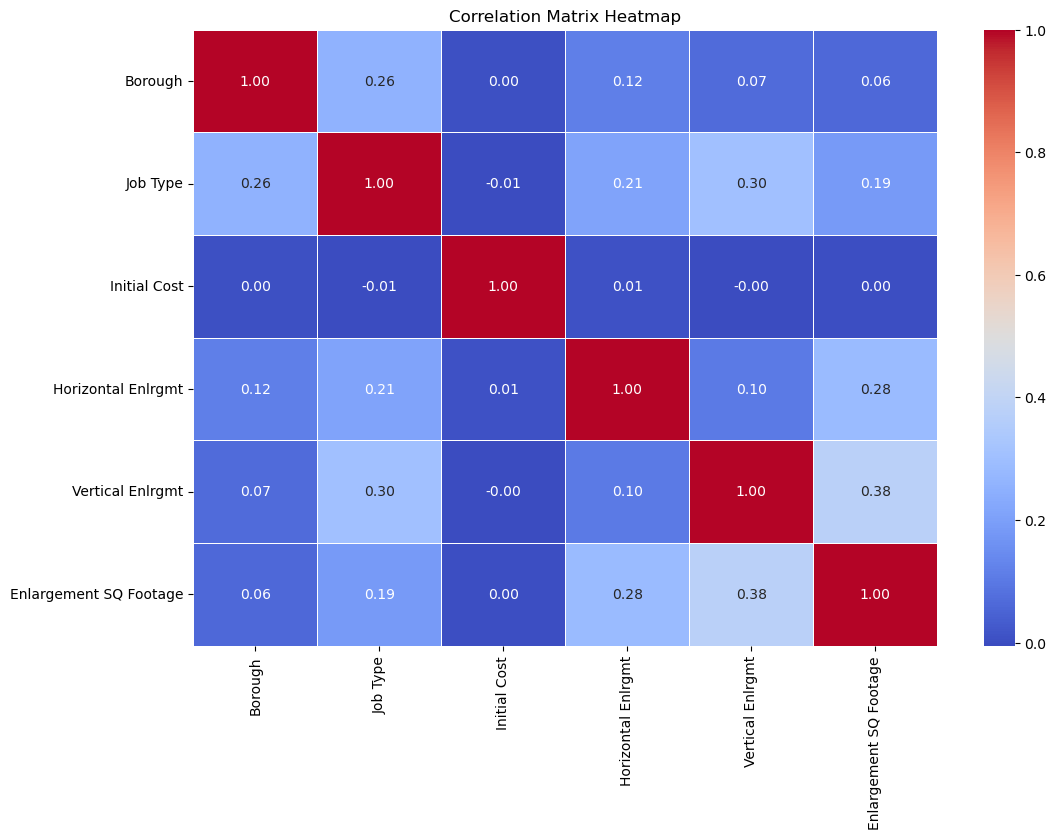

In [194]:
# Create a heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()